### NMF notebook
Show how NMF can determine movie topics based on user ratings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
movie_df = pd.read_csv('movies.csv')

In [3]:
movie_df.head()

,Name,Airplane!,Annhilation,Avatar,Batman,Batman (The Dark Night Trilogy),Batman & Robin,Beasts of the Southern Wild,Big Fish,Blade Runner 2049,Blazing Saddles,Brave Heart,Dark Crystal,Dumb and Dumber,Forrest Gump,Frozen,Gattaca,Ghost in the Shell (1995),Ghost in the Shell (2017),Good Will Hunting,Green Lantern,Hereditary,High School Musical,How to Lose a Guy in 10 days,Ice Age,Inception,Inside Out,Interstellar,Iron Man 2,It: Chapter 2,John Wick,Joker,Layer Cake,Mad Max: Fury Road,Mean Girls,Moana,Ocean's 8,Office Space,Old Guard,Onward,Predator,Pretty Woman,Raiders of the Lost Ark,Ready Player One,Rocky,Scarface,Shrek,Shrek 3,Snatch,Space Balls,Space Jam,Speed 2,Star Wars,Ted 2,The Avengers,The Big Lebowski,The Core,The Dark Knight,The Fast and the Furious,The Happening,The Hobbit,The Last Airbender,The Martian,The Matrix,The Notebook,The Prestige,The Revenant,The Shawshank Redemption,The Social Network,There Will Be Blood,Tinker Taylor Soldier Spy,Titanic,Transformers,Twilight,Upgrade,What We Do in Shadows,White Chicks,Wonder Woman
0,Alexander Wyman,4.0,NaN,1.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4,2.0,NaN,NaN,NaN,4.0,2.0,NaN,2.0,3.0,4.0,5.0,5.0,4.0,4.0,NaN,5.0,NaN,NaN,5.0,5.0,3.0,NaN,5.0,NaN,NaN,5.0,NaN,4.0,4.0,5.0,NaN,5.0,3.0,NaN,3.0,5.0,NaN,4.0,3.0,2.0,5.0,NaN,4.0,3.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,4.0,NaN
1,Alex Rose,5.0,NaN,3.0,3.0,4.0,2.0,NaN,NaN,4.0,NaN,3.0,NaN,3.0,4,3.0,NaN,3.0,NaN,NaN,1.0,NaN,2.0,NaN,3.0,3.0,NaN,NaN,3.0,NaN,4.0,NaN,NaN,5.0,5.0,5.0,NaN,4.0,NaN,NaN,4.0,NaN,4.0,3.0,NaN,NaN,4.0,1.0,NaN,5.0,NaN,NaN,4.0,NaN,4.0,4.0,NaN,4.0,NaN,NaN,3.0,NaN,NaN,4.0,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0
2,Anna Hanson,5.0,NaN,4.0,3.0,4.0,2.0,NaN,5.0,NaN,5.0,4.0,1.0,2.0,3,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,3.0,4.0,5.0,4.0,3.0,NaN,5.0,NaN,NaN,4.0,5.0,5.0,NaN,5.0,5.0,5.0,NaN,3.0,4.0,2.0,2.0,3.0,5.0,NaN,5.0,5.0,3.0,NaN,4.0,NaN,4.0,5.0,NaN,NaN,2.0,NaN,NaN,NaN,4.0,5.0,2.0,NaN,NaN,4.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,5.0,NaN,5.0
3,Christopher Sulfrian,NaN,4.0,3.0,NaN,NaN,NaN,NaN,3.0,4.0,4.0,4.0,NaN,3.0,3,4.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,3.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,4.0,5.0,5.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN,4.0,1.0,5.0,NaN,NaN,5.0,NaN,4.0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,5.0,NaN,NaN
4,Danait Aregay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,5.0,5.0


In [4]:
movie_df

,Name,Airplane!,Annhilation,Avatar,Batman,Batman (The Dark Night Trilogy),Batman & Robin,Beasts of the Southern Wild,Big Fish,Blade Runner 2049,Blazing Saddles,Brave Heart,Dark Crystal,Dumb and Dumber,Forrest Gump,Frozen,Gattaca,Ghost in the Shell (1995),Ghost in the Shell (2017),Good Will Hunting,Green Lantern,Hereditary,High School Musical,How to Lose a Guy in 10 days,Ice Age,Inception,Inside Out,Interstellar,Iron Man 2,It: Chapter 2,John Wick,Joker,Layer Cake,Mad Max: Fury Road,Mean Girls,Moana,Ocean's 8,Office Space,Old Guard,Onward,Predator,Pretty Woman,Raiders of the Lost Ark,Ready Player One,Rocky,Scarface,Shrek,Shrek 3,Snatch,Space Balls,Space Jam,Speed 2,Star Wars,Ted 2,The Avengers,The Big Lebowski,The Core,The Dark Knight,The Fast and the Furious,The Happening,The Hobbit,The Last Airbender,The Martian,The Matrix,The Notebook,The Prestige,The Revenant,The Shawshank Redemption,The Social Network,There Will Be Blood,Tinker Taylor Soldier Spy,Titanic,Transformers,Twilight,Upgrade,What We Do in Shadows,White Chicks,Wonder Woman
0,Alexander Wyman,4.0,NaN,1.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4,2.0,NaN,NaN,NaN,4.0,2.0,NaN,2.0,3.0,4.0,5.0,5.0,4.0,4.0,NaN,5.0,NaN,NaN,5.0,5.0,3.0,NaN,5.0,NaN,NaN,5.0,NaN,4.0,4.0,5.0,NaN,5.0,3.0,NaN,3.0,5.0,NaN,4.0,3.0,2.0,5.0,NaN,4.0,3.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,4.0,NaN
1,Alex Rose,5.0,NaN,3.0,3.0,4.0,2.0,NaN,NaN,4.0,NaN,3.0,NaN,3.0,4,3.0,NaN,3.0,NaN,NaN,1.0,NaN,2.0,NaN,3.0,3.0,NaN,NaN,3.0,NaN,4.0,NaN,NaN,5.0,5.0,5.0,NaN,4.0,NaN,NaN,4.0,NaN,4.0,3.0,NaN,NaN,4.0,1.0,NaN,5.0,NaN,NaN,4.0,NaN,4.0,4.0,NaN,4.0,NaN,NaN,3.0,NaN,NaN,4.0,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0
2,Anna Hanson,5.0,NaN,4.0,3.0,4.0,2.0,NaN,5.0,NaN,5.0,4.0,1.0,2.0,3,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,3.0,4.0,5.0,4.0,3.0,NaN,5.0,NaN,NaN,4.0,5.0,5.0,NaN,5.0,5.0,5.0,NaN,3.0,4.0,2.0,2.0,3.0,5.0,NaN,5.0,5.0,3.0,NaN,4.0,NaN,4.0,5.0,NaN,NaN,2.0,NaN,NaN,NaN,4.0,5.0,2.0,NaN,NaN,4.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,5.0,NaN,5.0
3,Christopher Sulfrian,NaN,4.0,3.0,NaN,NaN,NaN,NaN,3.0,4.0,4.0,4.0,NaN,3.0,3,4.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,3.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,4.0,5.0,5.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN,4.0,1.0,5.0,NaN,NaN,5.0,NaN,4.0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,5.0,NaN,NaN
4,Danait Aregay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,5.0,5.0
5,David Huergo,NaN,NaN,4.0,NaN,5.0,4.0,NaN,4.0,NaN,NaN,3.0,4.0,3.0,3,4.0,NaN,5.0,3.0,4.0,NaN,NaN,NaN,NaN,3.0,4.0,4.0,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN,4.0,3.0,NaN,3.0,NaN,3.0,NaN,NaN,3.0,2.0,2.0,3.0,3.0,NaN,3.0,3.0,NaN,4.0,NaN,3.0,NaN,NaN,5.0,3.0,NaN,4.0,1.0,NaN,5.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN
6,Devin Link,5.0,1.0,1.0,1.0,NaN,NaN,NaN,4.0,NaN,3.0,2.0,NaN,NaN,3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
7,Jeffrey Bauerle,4.0,NaN,4.0,4.0,5.0,NaN,NaN,3.0,NaN,4.0,5.0,NaN,5.0,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,5.0,5.0,4.0,NaN,3.0,4.0,NaN,NaN,NaN,5.0,NaN,5.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,4.0,NaN,5.0,3.0,NaN,5.0,NaN,NaN,5.0,NaN,5.0,NaN,NaN,1.0,NaN,5.0,5.0,NaN,5.0,NaN,5.0,NaN,1.0,NaN,5.0,2.0,NaN,NaN,NaN,NaN,5.0
8,Jennifer O'Shea,5.0,NaN,NaN,4.0,4.0,NaN,NaN,4.0,NaN,5.0,NaN,NaN,4.0,5,3.0,NaN,NaN,NaN,5.0,NaN,NaN,3.0,5.0,3.0,4.0,5.0,4.0,3.0,NaN,NaN,4.0,NaN,1.0,5.0,4.0,NaN,4.0,NaN,3.0,NaN,5.0,5.0,NaN,5.0,NaN,5.0,1.0,NaN,3.0,5.0,NaN,5.0,NaN,3.0,5.0,NaN,5.0,2.0,NaN,5.0,NaN,5.0,4.0,4.0,NaN,NaN,NaN,3.0,NaN,NaN,5.0,NaN,3.0,NaN,4.0,4.0,3.0
9,Joshua Aldous,NaN,NaN,5.0,2.0,2.0,1.0,NaN,NaN,N

In [5]:
movie_df.columns

Index(['Name', 'Airplane!', 'Annhilation', 'Avatar', 'Batman',
       'Batman (The Dark Night Trilogy)', 'Batman & Robin',
       'Beasts of the Southern Wild', 'Big Fish', 'Blade Runner 2049',
       'Blazing Saddles', 'Brave Heart', 'Dark Crystal', 'Dumb and Dumber',
       'Forrest Gump', 'Frozen', 'Gattaca', 'Ghost in the Shell (1995)',
       'Ghost in the Shell (2017)', 'Good Will Hunting', 'Green Lantern',
       'Hereditary', 'High School Musical', 'How to Lose a Guy in 10 days',
       'Ice Age', 'Inception', 'Inside Out', 'Interstellar', 'Iron Man 2',
       'It: Chapter 2', 'John Wick', 'Joker', 'Layer Cake',
       'Mad Max: Fury Road', 'Mean Girls', 'Moana', 'Ocean's 8',
       'Office Space', 'Old Guard', 'Onward', 'Predator', 'Pretty Woman',
       'Raiders of the Lost Ark', 'Ready Player One', 'Rocky', 'Scarface',
       'Shrek ', 'Shrek 3 ', 'Snatch', 'Space Balls', 'Space Jam', 'Speed 2',
       'Star Wars', 'Ted 2', 'The Avengers', 'The Big Lebowski', 'The Core',
   

In [6]:
# clean up data frame
movie_df.columns = [col.lower().replace(' ', '_') for col in movie_df.columns]
movie_df.fillna(0, inplace = True)  # Whoa!  What are we doing here?  A good idea?  Necessary for now.
movie_df.set_index('name', inplace = True)

In [7]:
# sanity check
movie_df.head()

,airplane!,annhilation,avatar,batman,batman_(the_dark_night_trilogy),batman_&_robin,beasts_of_the_southern_wild,big_fish,blade_runner_2049,blazing_saddles,brave_heart,dark_crystal,dumb_and_dumber,forrest_gump,frozen,gattaca,ghost_in_the_shell_(1995),ghost_in_the_shell_(2017),good_will_hunting,green_lantern,hereditary,high_school_musical,how_to_lose_a_guy_in_10_days,ice_age,inception,inside_out,interstellar,iron_man_2,it:_chapter_2,john_wick,joker,layer_cake,mad_max:_fury_road,mean_girls,moana,ocean's_8,office_space,old_guard,onward,predator,pretty_woman,raiders_of_the_lost_ark,ready_player_one,rocky,scarface,shrek_,shrek_3_,snatch,space_balls,space_jam,speed_2,star_wars,ted_2,the_avengers,the_big_lebowski,the_core,the_dark_knight,the_fast_and_the_furious,the_happening,the_hobbit,the_last_airbender,the_martian,the_matrix,the_notebook,the_prestige,the_revenant,the_shawshank_redemption,the_social_network,there_will_be_blood,tinker_taylor_soldier_spy,titanic,transformers,twilight,upgrade,what_we_do_in_shadows,white_chicks,wonder_woman
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alexander Wyman,4.0,0.0,1.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4,2.0,0.0,0.0,0.0,4.0,2.0,0.0,2.0,3.0,4.0,5.0,5.0,4.0,4.0,0.0,5.0,0.0,0.0,5.0,5.0,3.0,0.0,5.0,0.0,0.0,5.0,0.0,4.0,4.0,5.0,0.0,5.0,3.0,0.0,3.0,5.0,0.0,4.0,3.0,2.0,5.0,0.0,4.0,3.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,4.0,0.0
Alex Rose,5.0,0.0,3.0,3.0,4.0,2.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,4,3.0,0.0,3.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,3.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,5.0,5.0,5.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,3.0,0.0,0.0,4.0,1.0,0.0,5.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0
Anna Hanson,5.0,0.0,4.0,3.0,4.0,2.0,0.0,5.0,0.0,5.0,4.0,1.0,2.0,3,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,4.0,3.0,0.0,5.0,0.0,0.0,4.0,5.0,5.0,0.0,5.0,5.0,5.0,0.0,3.0,4.0,2.0,2.0,3.0,5.0,0.0,5.0,5.0,3.0,0.0,4.0,0.0,4.0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,5.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,0.0,5.0
Christopher Sulfrian,0.0,4.0,3.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,4.0,0.0,3.0,3,4.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,3.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,4.0,5.0,5.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,4.0,1.0,5.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0
Danait Aregay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,5.0


## NMF for topic analysis: motivation

You've seen with PCA and SVD that you can decompose a matrix (in this running example, of users, movies, and their ratings of the movies) into latent topics that help relate groups of movies (or words, or books, or whatever your features are in the matrix). 

### Start with SVD

In [8]:
from numpy.linalg import svd

mat = movie_df.values
movies = movie_df.columns
names = movie_df.index

# Compute SVD
U, sigma, VT = svd(mat)

# do 3 topics...for now 
k = 3
topics = ['latent_topic_{}'.format(i) for i in range(k)]

# Keep top k concepts for comparison
U = U[:,:k]
sigma = sigma[:k]
VT = VT[:k,:]

# Make pretty
U, sigma, VT = (np.around(x,2) for x in (U,sigma,VT))
U = pd.DataFrame(U, index = names, columns = topics)
VT = pd.DataFrame(VT, index = topics, columns = movies)

print('\nMatrix U: people-topic')
print(U)
print('\nMatrix S: singular values')
print(sigma)
print('\nMatrix V: topic-movies')
print(VT)


Matrix U: people-topic
                      latent_topic_0  latent_topic_1  latent_topic_2
name                                                                
Alexander Wyman                -0.28           -0.01           -0.02
Alex Rose                      -0.22            0.15            0.04
Anna Hanson                    -0.29            0.01           -0.08
Christopher Sulfrian           -0.22            0.30            0.09
Danait Aregay                  -0.12           -0.24           -0.08
David Huergo                   -0.20           -0.16            0.17
Devin Link                     -0.08           -0.16           -0.28
Jeffrey Bauerle                -0.27            0.03            0.30
Jennifer O'Shea                -0.29           -0.32           -0.22
Joshua Aldous                  -0.21            0.33            0.08
Lawrence Williams              -0.27            0.06            0.28
Martha Wood                    -0.23           -0.47            0.04
Ryan Kelle

## Problems with SVD for topic analysis

**Recall:** $M = U S V^T$

Values in $U$ and $V^T$ can be negative, which is weird and hard to interpret. For example, suppose a latent feature is the genre 'Sci-fi'. This feature can be positive (makes sense), zero (makes sense), or negative (what does that mean?).

In [9]:
# Let's try using NMF instead....
k = 6 # number of topics
topics = ['latent_topic_{}'.format(i) for i in range(k)]
from sklearn.decomposition import NMF
nmf = NMF(n_components = k)
nmf.fit(mat)

W = nmf.transform(mat)
H = nmf.components_

W = pd.DataFrame(W, index = names, columns = topics)
H = pd.DataFrame(H, index = topics, columns = movies)

W,H = (np.around(x,2) for x in (W, H))

# this shows the components 
print(W.head(30), '\n\n', H.head(k))

                      latent_topic_0  latent_topic_1  latent_topic_2  \
name                                                                   
Alexander Wyman                 0.85            0.00            0.00   
Alex Rose                       1.51            0.00            0.00   
Anna Hanson                     2.15            0.00            0.44   
Christopher Sulfrian            3.09            0.00            0.00   
Danait Aregay                   0.21            0.00            0.00   
David Huergo                    0.00            0.00            0.00   
Devin Link                      0.00            0.00            0.22   
Jeffrey Bauerle                 2.15            1.03            0.00   
Jennifer O'Shea                 0.49            0.69            0.76   
Joshua Aldous                   2.22            0.12            0.15   
Lawrence Williams               1.47            3.26            0.00   
Martha Wood                     0.00            0.00            

In [10]:
# check reconstructions

# stop truncation
#np.set_printoptions(threshold=np.nan)
# prevent exponential notation
np.set_printoptions(suppress=True)

# original matrix
print("\nOriginal matrix")
print(mat)

# # svd reconstruction
# print("\nSVD reconstruction")
# print('\n', np.around(np.dot(U, np.diag(sigma)).dot(VT), 2))

# # nmf reconstruction
print("\nNMF reconstruction")
print('\n', np.around(W.dot(H), 2))


Original matrix
[[4. 0. 1. 4. 4. 5. 0. 0. 0. 0. 4. 4. 4. 4. 2. 0. 0. 0. 4. 2. 0. 2. 3. 4.
  5. 5. 4. 4. 0. 5. 0. 0. 5. 5. 3. 0. 5. 0. 0. 5. 0. 4. 4. 5. 0. 5. 3. 0.
  3. 5. 0. 4. 3. 2. 5. 0. 4. 3. 0. 5. 0. 0. 5. 0. 0. 0. 4. 2. 0. 0. 0. 1.
  2. 0. 0. 4. 0.]
 [5. 0. 3. 3. 4. 2. 0. 0. 4. 0. 3. 0. 3. 4. 3. 0. 3. 0. 0. 1. 0. 2. 0. 3.
  3. 0. 0. 3. 0. 4. 0. 0. 5. 5. 5. 0. 4. 0. 0. 4. 0. 4. 3. 0. 0. 4. 1. 0.
  5. 0. 0. 4. 0. 4. 4. 0. 4. 0. 0. 3. 0. 0. 4. 0. 5. 0. 4. 0. 0. 0. 0. 2.
  0. 0. 0. 0. 4.]
 [5. 0. 4. 3. 4. 2. 0. 5. 0. 5. 4. 1. 2. 3. 4. 0. 0. 0. 4. 0. 0. 0. 2. 3.
  4. 5. 4. 3. 0. 5. 0. 0. 4. 5. 5. 0. 5. 5. 5. 0. 3. 4. 2. 2. 3. 5. 0. 5.
  5. 3. 0. 4. 0. 4. 5. 0. 0. 2. 0. 0. 0. 4. 5. 2. 0. 0. 4. 0. 0. 0. 2. 0.
  0. 0. 5. 0. 5.]
 [0. 4. 3. 0. 0. 0. 0. 3. 4. 4. 4. 0. 3. 3. 4. 0. 0. 0. 3. 0. 2. 0. 0. 3.
  4. 4. 5. 0. 0. 0. 0. 5. 3. 0. 5. 0. 5. 0. 0. 0. 0. 4. 0. 0. 0. 4. 4. 5.
  5. 4. 0. 4. 0. 0. 5. 0. 0. 4. 1. 5. 0. 0. 5. 0. 4. 0. 4. 3. 0. 0. 0. 0.
  3. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 

## Interpreting Concepts
#### Think of NMF like 'fuzzy clustering'
- The concepts are clusters
- Each row (document, user, etc...) can belong to more than one concept

#### Top Questions:
1. What do the concepts (clusters) mean?
2. To which concept(s) does each user/document belong?

### What are the topics?

In [11]:
# Top 10 movies in topic 0
tpic = 0
num_movies = 5
top_movies = H.iloc[tpic].sort_values(ascending=False).index[:num_movies]
top_movies

Index(['the_big_lebowski', 'office_space', 'space_balls',
       'raiders_of_the_lost_ark', 'snatch'],
      dtype='object')

In [12]:
# Top 10 movies in topic 1
tpic = 1
num_movies = 5
top_movies = H.iloc[tpic].sort_values(ascending=False).index[:num_movies]
top_movies

Index(['the_dark_knight', 'the_shawshank_redemption',
       'batman_(the_dark_night_trilogy)', 'good_will_hunting', 'the_prestige'],
      dtype='object')

In [13]:
# Top 10 movies in topic 2
tpic = 2
num_movies = 5
top_movies = H.iloc[tpic].sort_values(ascending=False).index[:num_movies]
top_movies

Index(['gattaca', 'beasts_of_the_southern_wild', 'the_hobbit', 'rocky',
       'mad_max:_fury_road'],
      dtype='object')

In [14]:
# Top 10 movies in topic 2
tpic = 3
num_movies = 5
top_movies = H.iloc[tpic].sort_values(ascending=False).index[:num_movies]
top_movies

Index(['batman_&_robin', 'predator', 'john_wick', 'the_dark_knight',
       'ready_player_one'],
      dtype='object')

In [15]:
# Top 10 movies in topic 2
tpic = 4
num_movies = 5
top_movies = H.iloc[tpic].sort_values(ascending=False).index[:num_movies]
top_movies

Index(['inside_out', 'onward', 'big_fish', 'the_martian', 'the_dark_knight'], dtype='object')

In [16]:
# Top 10 movies in topic 2
tpic = 5
num_movies = 5
top_movies = H.iloc[tpic].sort_values(ascending=False).index[:num_movies]
top_movies

Index(['mean_girls', 'how_to_lose_a_guy_in_10_days', 'white_chicks', 'ice_age',
       'shrek_'],
      dtype='object')

### Which users align with concept 0?

In [17]:
# Top 5 users for topic 0
tpic = 5
top_users = W.iloc[:,tpic].sort_values(ascending=False).index[:5]
top_users

Index(['Danait Aregay', 'Jennifer O'Shea', 'Megan Ables', 'Devin Link',
       'Alexander Wyman'],
      dtype='object', name='name')

In [18]:
# Top 5 users for topic 1
tpic = 1
top_users = W.iloc[:,tpic].sort_values(ascending=False).index[:5]
top_users

Index(['Travis Koenigsknecht', 'Lawrence Williams', 'Ryan Kelley',
       'Chris Reger', 'Kayla Thomas'],
      dtype='object', name='name')

In [19]:
# Top 5 users for topic 2
tpic = 2
top_users = W.iloc[:,tpic].sort_values(ascending=False).index[:5]
top_users

Index(['Frank Burkholder', 'Chris Reger', 'Ryan Kelley', 'Jennifer O'Shea',
       'Anna Hanson'],
      dtype='object', name='name')

### What concepts does do I align with?

In [20]:
# feel free to fill in your name and check it out for yourself 
W.loc['Scott Schmidl']

latent_topic_0    0.00
latent_topic_1    0.90
latent_topic_2    0.00
latent_topic_3    2.54
latent_topic_4    0.00
latent_topic_5    0.00
Name: Scott Schmidl, dtype: float64

In [21]:
# these are the movies associated with the latent topic I align most with  
H.loc['latent_topic_2'].sort_values(ascending=False).head()

gattaca                        1.32
beasts_of_the_southern_wild    1.28
the_hobbit                     1.24
rocky                          1.22
mad_max:_fury_road             1.21
Name: latent_topic_2, dtype: float64

### What are all the movies in each topic?

In [22]:
# Number of movies in each concept
thresh = .7  # movie is included if at least thresh% of max weight
for g in range(k):
    all_movies = H.iloc[g,:]
    included = H.columns[all_movies >= (thresh * all_movies.max())]
    print("\nTopic %i contains: %s" % (g, ', '.join(included)))


Topic 0 contains: office_space, raiders_of_the_lost_ark, space_balls, the_big_lebowski

Topic 1 contains: batman_(the_dark_night_trilogy), good_will_hunting, the_dark_knight, the_prestige, the_shawshank_redemption, the_social_network

Topic 2 contains: beasts_of_the_southern_wild, blade_runner_2049, blazing_saddles, dark_crystal, gattaca, good_will_hunting, mad_max:_fury_road, pretty_woman, raiders_of_the_lost_ark, rocky, star_wars, the_hobbit, wonder_woman

Topic 3 contains: batman_(the_dark_night_trilogy), batman_&_robin, brave_heart, dumb_and_dumber, good_will_hunting, inception, iron_man_2, john_wick, predator, ready_player_one, space_jam, star_wars, the_dark_knight, the_hobbit, the_matrix

Topic 4 contains: big_fish, inside_out, onward, star_wars, the_dark_knight, the_martian, titanic

Topic 5 contains: how_to_lose_a_guy_in_10_days, mean_girls


### Which users are associated with each topic?

In [23]:
# Users in each concept
thresh = .2  # movie is included if at least 30% of max weight
for g in range(k):
    all_users = W.iloc[:,g]
    included = W.index[all_users >= (thresh * all_users.max())]
    print("\nTopic {} contains: {}".format(g, ', '.join(included)))


Topic 0 contains: Alexander Wyman, Alex Rose, Anna Hanson, Christopher Sulfrian, Jeffrey Bauerle, Joshua Aldous, Lawrence Williams, Ryan Kelley, Chris Reger, Travis Koenigsknecht

Topic 1 contains: Jeffrey Bauerle, Lawrence Williams, Ryan Kelley, Scott Schmidl, Chris Reger, Kayla Thomas, Travis Koenigsknecht

Topic 2 contains: Ryan Kelley, Frank Burkholder, Chris Reger

Topic 3 contains: Alexander Wyman, Alex Rose, David Huergo, Joshua Aldous, Scott Schmidl

Topic 4 contains: Anna Hanson, David Huergo, Jeffrey Bauerle, Jennifer O'Shea, Martha Wood

Topic 5 contains: Alexander Wyman, Alex Rose, Anna Hanson, Danait Aregay, Devin Link, Jennifer O'Shea, Chris Reger, Kayla Thomas, Megan Ables


## Choosing number of topics by looking at reconstruction error

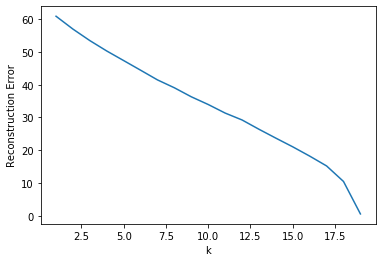

In [24]:
# Compute NMF
from sklearn.decomposition import NMF

def fit_nmf(k):
    nmf = NMF(n_components=k)
    nmf.fit(mat)
    W = nmf.transform(mat);
    H = nmf.components_;
    return nmf.reconstruction_err_

n_comp = 20
error = [fit_nmf(i) for i in range(1,n_comp)]
plt.plot(range(1,n_comp), error)
plt.xlabel('k')
plt.ylabel('Reconstruction Error');

### Some other stuff you may find helpful with your assignment....

In [25]:
A = np.array([[1, 2], [-3, 4]])
b = np.array([7, -9])

print(np.linalg.solve(A, b))

[4.6 1.2]


### Least Squares Solver

What if we have an overdetermined system of linear equations? E.g.

$$ \begin{bmatrix} 1 & 2 \\ -3 & 4 \\ 1 & -4 \end{bmatrix} \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right] = \left[ \begin{array}{cc} 7 \\ -9 \\ 17 \end{array} \right] $$

An exact solution is not guaranteed, so we must do something else. Least Squares dictates that we find the $x$ that minimizes the residual sum of squares (RSS).

(Note: This is the solver we use when doing Linear Regression!)

In [26]:
A = np.array([[1, 2], [-3, 4], [1, -4]])
b = np.array([7, -9, 17])

print(np.linalg.lstsq(A, b)[0])

[ 2.88 -1.38]


/home/frank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [27]:
A.clip(min=0)

array([[1, 2],
       [0, 4],
       [1, 0]])

### Non-negative Least Squares Solver

What if you want to constrain the solution to be non-negative? (Doing such a thing will be important to us today.)

We have optomizers for that too!

In [28]:
from scipy.optimize import nnls

A = np.array([[1, 2], [-3, 4], [1, -4]])
b = np.array([7, -9, 17])

print(nnls(A, b)[0])

[4.63636364 0.        ]
